# Contents

- Impoting libraries

- Importing data set

- Profiling customers

- Grouping

- Visualisations

- Aggregate Variables

- Comparison of regions

- Charts

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing data set orders_products_combinedNEW.pkl
df_all_low_excluded = pd.read_pickle(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\02 Data\Prepared Data\all_low_excluded.pkl'))

In [3]:
df_all_low_excluded.shape

(30964564, 35)

# Question 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [4]:
#checking prices max
df_all_low_excluded['prices'].max()

99999.0

In [5]:
#creating new values for prices over 100
df_all_low_excluded.loc[df_all_low_excluded['prices'] >100, 'prices'] = np.nan

In [6]:
#checking prices max
df_all_low_excluded['prices'].max()

25.0

In [7]:
#Importing data set departments.csv - realised I did not have this in the main data
df_dep = pd.read_csv(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\02 Data\Original Data\departments.csv', index_col = False)

In [8]:
df_dep_t = df_dep.T

In [9]:
# Take the first row of df_dep_t for the header
new_header = df_dep_t.iloc[0]

In [10]:
df_dep_t_new = df_dep_t[1:]

In [11]:
#set the header row as the df header
df_dep_t_new.columns = new_header

In [12]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


# Age Group

In [13]:
#creating column for sorting ages - sorted using generations
age_group = []
for value in df_all_low_excluded['age']:
  if value>=18 and value<=25:
    age_group.append('Gen Z')
  elif value>=26 and value<=41:
    age_group.append('Millennial')
  elif value>=42 and value<=57:
    age_group.append('Gen X')
  elif value>=58 and value<=76:
    age_group.append('Baby Boomer')
  else:
    age_group.append("Silent Generation")

In [14]:
# fixing new column
df_all_low_excluded['age_group'] = age_group

In [15]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,marital_status,income,region,activity,age_group
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennial


In [16]:
#age group count
df_all_low_excluded['age_group'].value_counts(dropna=False)

Baby Boomer          9099009
Gen X                7829801
Millennial           7735184
Gen Z                3864518
Silent Generation    2436052
Name: age_group, dtype: int64

# Department Tags

In [17]:
#creating column for DEPARTMENTS
department = []
for value in df_all_low_excluded['department_id']:
  if value == 1:
    department.append('frozen')
  elif value == 2:
    department.append('other')
  elif value == 3:
    department.append('bakery')
  elif value == 4:
    department.append('produce')
  elif value == 5:
    department.append('alcohol')  
  elif value == 6:
    department.append('international')
  elif value == 7:
    department.append('beverages')  
  elif value == 8:
    department.append('pets')
  elif value == 9:
    department.append('dry goods pasta')  
  elif value == 10:
    department.append('bulk')
  elif value == 11:
    department.append('personal care')  
  elif value == 12:
    department.append('meat seafood')
  elif value == 13:
    department.append('pantry')  
  elif value == 14:
    department.append('breakfast')
  elif value == 15:
    department.append('canned goods')  
  elif value == 16:
    department.append('dairy eggs')
  elif value == 17:
    department.append('household')
  elif value == 18:
    department.append('babies')
  elif value == 19:
    department.append('snacks')
  elif value == 20:
    department.append('deli')
  else:
    department.append('missing')

In [18]:
# fixing new column
df_all_low_excluded['department'] = department

In [19]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,marital_status,income,region,activity,age_group,department
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer,Millennial,beverages


In [20]:
#department count
df_all_low_excluded['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

# Income Split

In [21]:
#creating column for income_bracket - sorted using tax brackets
income_bracket = []
for value in df_all_low_excluded['income']:
  if value>=25903 and value<=64000:
    income_bracket.append('extremely low income')
  elif value>=64001 and value<=96000:
    income_bracket.append('low income')
  elif value>=96001 and value<=111000:
    income_bracket.append('mid-range income')
  elif value>=111001 and value<=131000:
    income_bracket.append('high income')
  elif value>=131001 and value<=146000:
    income_bracket.append('very high income')
  else:
    income_bracket.append("extremely high income")

In [22]:
# fixing new column
df_all_low_excluded['income_bracket'] = income_bracket

In [23]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,marital_status,income,region,activity,age_group,department,income_bracket
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,high-activity customer,Millennial,beverages,extremely low income


In [24]:
#department count
df_all_low_excluded['income_bracket'].value_counts(dropna=False)

low income               8347316
extremely low income     6825815
extremely high income    4601561
mid-range income         4483919
high income              4074507
very high income         2631446
Name: income_bracket, dtype: int64

# Pet Owners

In [25]:
#creating column for pet owners - sorted using department sales
pet_owner = []
for value in df_all_low_excluded['department_id']:
  if value>=8:
    pet_owner.append('pet owner')
  else:
    pet_owner.append("not a pet owner")

In [26]:
# fixing new column
df_all_low_excluded['pet_owner'] = pet_owner

In [27]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,marital_status,income,region,activity,age_group,department,income_bracket,pet_owner
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high-activity customer,Millennial,beverages,extremely low income,not a pet owner


In [28]:
df_all_low_excluded['pet_owner'].value_counts(dropna=False)

pet owner          15635802
not a pet owner    15328762
Name: pet_owner, dtype: int64

# Family Shape

In [29]:
#creating column for family shape - with baby
df_all_low_excluded.loc[(df_all_low_excluded['department_id'] == 18) & (df_all_low_excluded['n_dependants'] >= 1), 'family_shape'] = 'Family with Baby'

In [30]:
#creating column for family shape no children
df_all_low_excluded.loc[df_all_low_excluded['n_dependants'] == 0, 'family_shape'] = 'No Children'

In [31]:
#creating column for family shape no children
df_all_low_excluded.loc[(df_all_low_excluded['department_id'] != 18) & (df_all_low_excluded['n_dependants'] >= 1), 'family_shape'] = 'Older Children'

In [32]:
df_all_low_excluded['family_shape'].value_counts(dropna=False)

Older Children      22917819
No Children          7739681
Family with Baby      307064
Name: family_shape, dtype: int64

In [30]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependants,marital_status,income,region,activity,age_group,department,income_bracket,pet_owner,family_shape
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,South,high-activity customer,Millennial,beverages,extremely low income,not a pet owner,Older Children


# Single People

In [31]:
#creating column for single_age
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'single') & (df_all_low_excluded['age_group'] == 'Gen Z'), 'single_age'] = 'Really Young Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'single') & (df_all_low_excluded['age_group'] == 'Silent Generation'), 'single_age'] = 'Old Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'single') & (df_all_low_excluded['age_group'] == 'Baby Boomer'), 'single_age'] = 'Older Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'single') & (df_all_low_excluded['age_group'] == 'Gen X'), 'single_age'] = 'Middle Age Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'single') & (df_all_low_excluded['age_group'] == 'Millennial'), 'single_age'] = 'Young Single'

In [32]:
#creating column for single_age
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'married') & (df_all_low_excluded['age_group'] == 'Silent Generation'), 'single_age'] = 'Not Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'married') & (df_all_low_excluded['age_group'] == 'Baby Boomer'), 'single_age'] = 'Not Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'married') & (df_all_low_excluded['age_group'] == 'Gen X'), 'single_age'] = 'Not Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'married') & (df_all_low_excluded['age_group'] == 'Millennial'), 'single_age'] = 'Not Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'married') & (df_all_low_excluded['age_group'] == 'Gen Z'), 'single_age'] = 'Not Single'

In [33]:
#creating column for single_age
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'living with parents and siblings') & (df_all_low_excluded['age_group'] == 'Gen Z'), 'single_age'] = 'Really Young Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'living with parents and siblings') & (df_all_low_excluded['age_group'] == 'Silent Generation'), 'single_age'] = 'Silent Generation Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'living with parents and siblings') & (df_all_low_excluded['age_group'] == 'Baby Boomer'), 'single_age'] = 'Older Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'living with parents and siblings') & (df_all_low_excluded['age_group'] == 'Gen X'), 'single_age'] = 'Middle Age Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'living with parents and siblings') & (df_all_low_excluded['age_group'] == 'Millennial'), 'single_age'] = 'Young Single'

In [34]:
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'divorced/widowed') & (df_all_low_excluded['age_group'] == 'Gen Z'), 'single_age'] = 'Really Young Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'divorced/widowed') & (df_all_low_excluded['age_group'] == 'Silent Generation'), 'single_age'] = 'Silent Generation Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'divorced/widowed') & (df_all_low_excluded['age_group'] == 'Baby Boomer'), 'single_age'] = 'Older Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'divorced/widowed') & (df_all_low_excluded['age_group'] == 'Gen X'), 'single_age'] = 'Middle Age Single'
df_all_low_excluded.loc[(df_all_low_excluded['marital_status'] == 'divorced/widowed') & (df_all_low_excluded['age_group'] == 'Millennial'), 'single_age'] = 'Young Single'

In [35]:
df_all_low_excluded.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,region,activity,age_group,department,income_bracket,pet_owner,family_shape,single_age
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,married,40423,South,high-activity customer,Millennial,beverages,extremely low income,not a pet owner,Older Children,Not Single


In [36]:
df_all_low_excluded['single_age'].value_counts(dropna=False)

Not Single                  21743711
Really Young Single          2434399
Older Single                 2294671
Young Single                 1947192
Middle Age Single            1932484
Silent Generation Single      612107
Name: single_age, dtype: int64

# Prices

In [34]:
df_all_low_excluded['price_range_loc'].value_counts(dropna=False)

NaN                   20164567
Low-range product      9674840
Mid-range product       727204
High-range product      397953
Name: price_range_loc, dtype: int64

In [35]:
#creating column for prices - sorted using tax brackets
price_ranges = []
for value in df_all_low_excluded['prices']:
  if value>=1 and value<=5:
    price_ranges.append('extremely low price')
  elif value>=6 and value<=10:
    price_ranges.append('low price')
  elif value>=11 and value<=15:
    price_ranges.append('mid-range price')
  elif value>=16 and value<=20:
    price_ranges.append('high price')
  else:
    price_ranges.append("extremely high price")

In [36]:
# fixing new column
df_all_low_excluded['price_ranges'] = price_ranges

In [37]:
df_all_low_excluded['price_ranges'].value_counts(dropna=False)

extremely low price     9674840
low price               9165420
mid-range price         7889681
extremely high price    4081769
high price               152854
Name: price_ranges, dtype: int64

In [38]:
df_all_low_excluded.shape

(30964564, 41)

# Question 6

Create an appropriate visualization to show the distribution of profiles.

In [69]:
df_hour_department = pd.crosstab(df_all_low_excluded['order_hour_of_day'], df_all_low_excluded['department'])

Text(0.5, 1.0, 'Order by Departments by Hour')

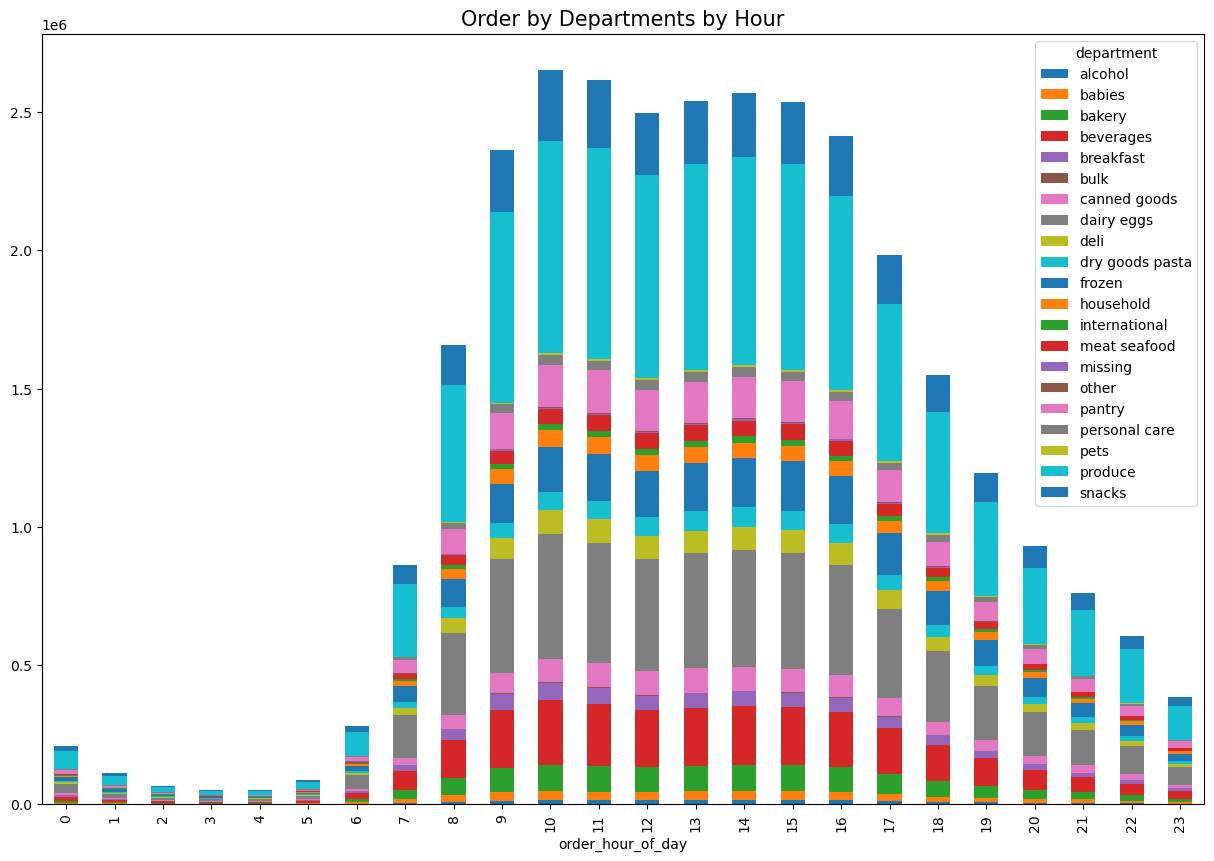

In [70]:
# Creatinga bar chart for departments and hour of the day
plt.rcParams["figure.figsize"] = (15,10)
bar_hour_department = df_hour_department.plot.bar(stacked=True)
plt.title('Order by Departments by Hour',fontsize=15)

In [71]:
#exporting bar chart as image 
bar_hour_department.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'bar_hour_department.png'))

Text(0.5, 1.0, 'Distribution by Price')

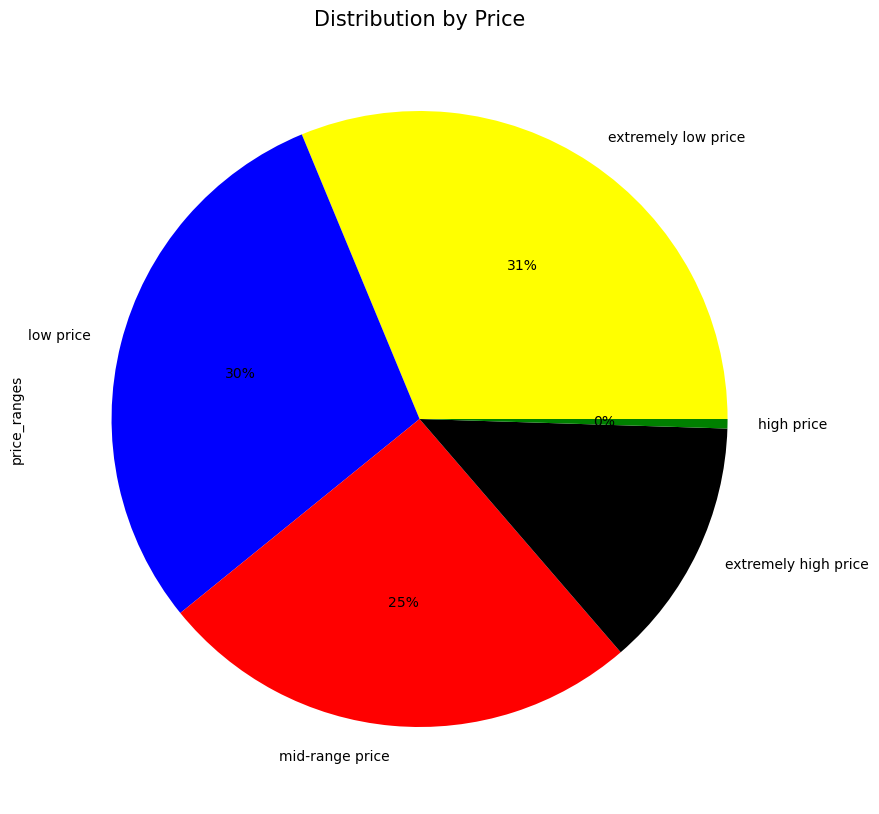

In [121]:
#creating bar chart for orders of the week with colour
price_tag_pie=df_all_low_excluded['price_ranges'].value_counts().plot.pie(labels=['extremely low price', 'low price','mid-range price', 'extremely high price','high price'], autopct=('%1.f%%'), colors=['yellow','blue','red','black','green'])
plt.title('Distribution by Price',fontsize=15)

In [122]:
#exporting bar chart as image 
price_tag_pie.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'price_tag_pie.png'))

In [115]:
#creating a bar chart for how many times orders in each department
df_ordering_region = pd.crosstab(df_all_low_excluded['region'], df_all_low_excluded['order_frequency_flag'])

Text(0.5, 1.0, 'Frequency of Ordering by Region')

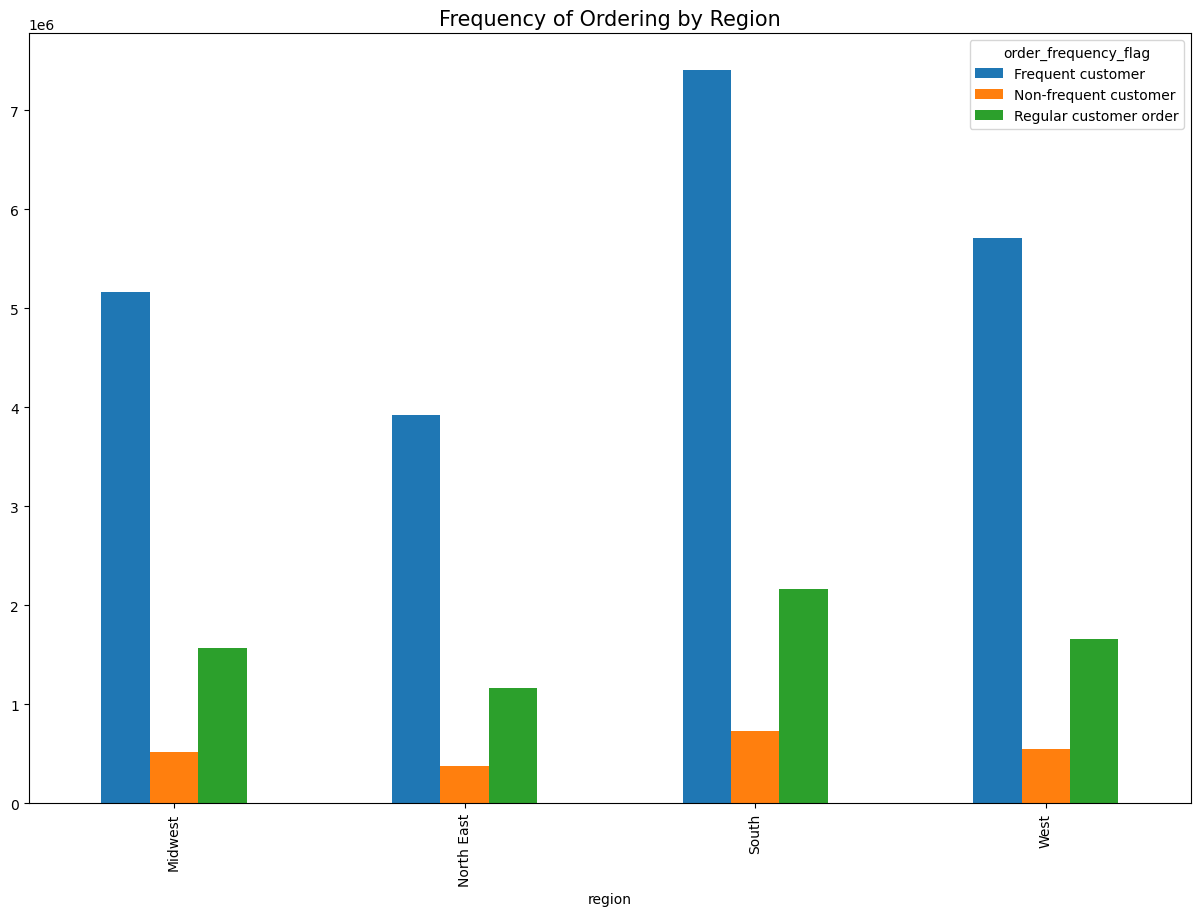

In [127]:
# Creatinga bar chart for departments and hour of the day
plt.rcParams["figure.figsize"] = (15,10)
ordering_region = df_ordering_region.plot.bar(stacked=False)
plt.title('Frequency of Ordering by Region',fontsize=15)

In [128]:
#exporting bar chart as image 
ordering_region.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'ordering_region.png'))

In [129]:
#creating a bar chart for how many times orders in each department
df_age_income = pd.crosstab(df_all_low_excluded['age_group'], df_all_low_excluded['income_bracket'])

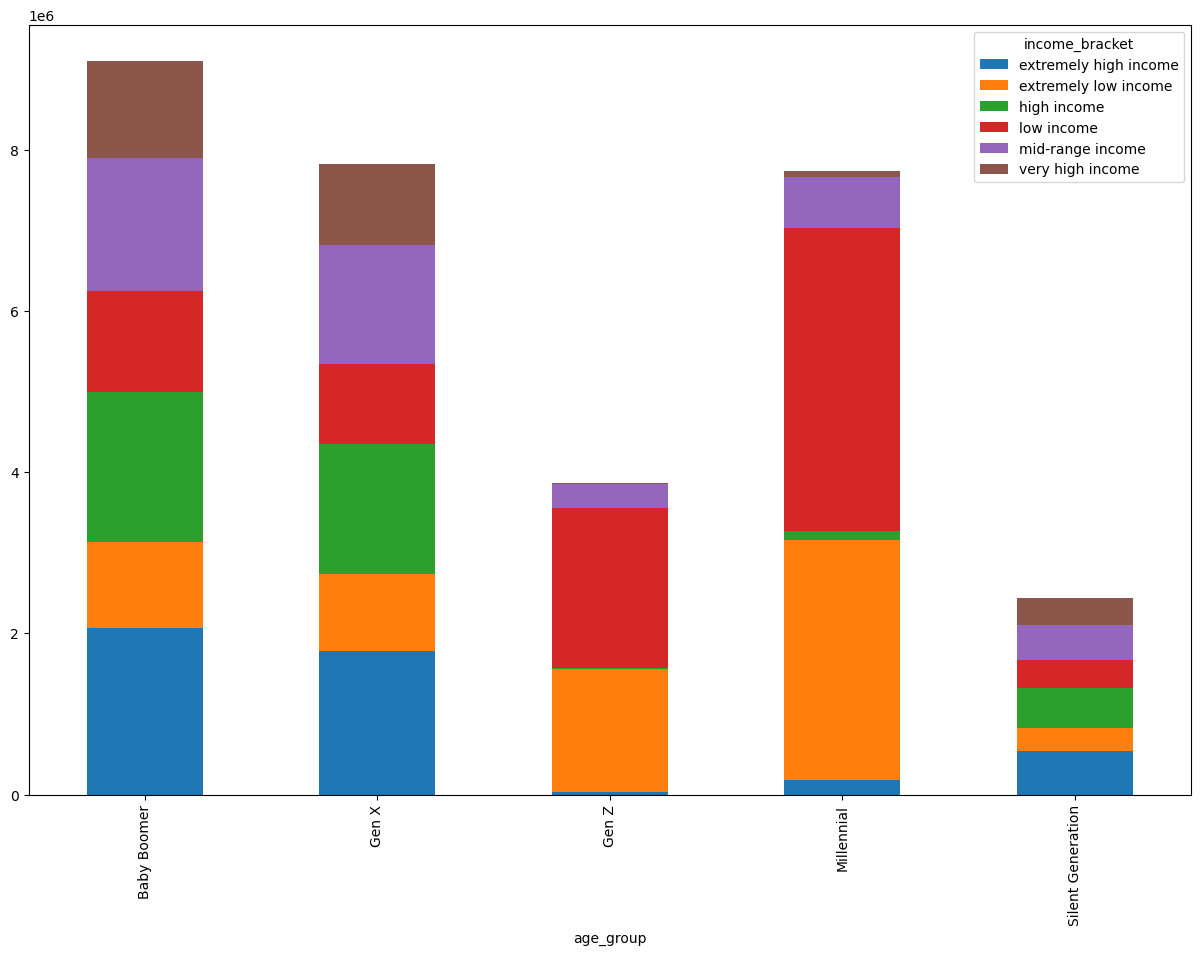

In [134]:
# Creatinga bar chart for age_hours crosstab
bar_age_income = df_age_income.plot.bar(stacked=True)

In [135]:
#exporting bar chart as image 
bar_age_income.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'bar_age_income.png'))

In [136]:
df_orders_hours_age = pd.crosstab(df_all_low_excluded['order_hour_of_day'], df_all_low_excluded['age_group'])

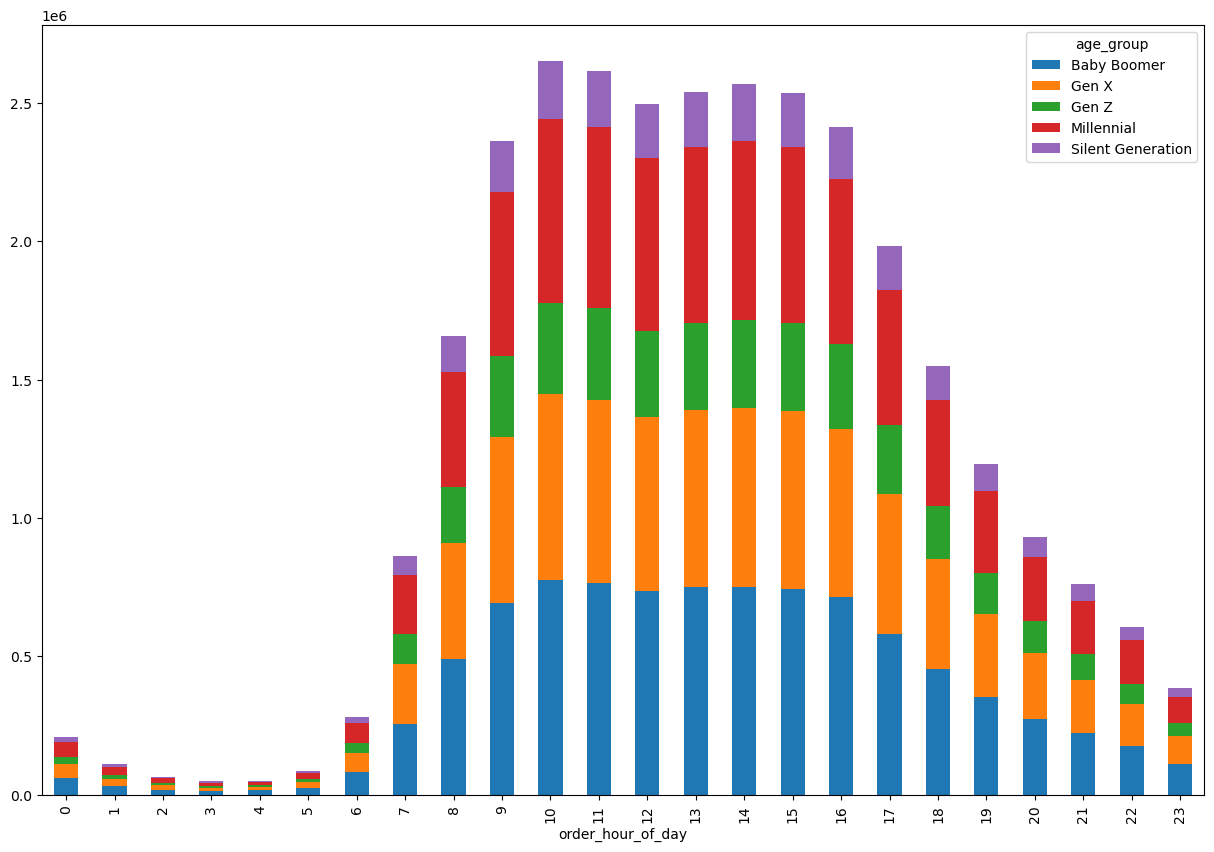

In [140]:
# Creatinga bar chart for age_hours crosstab
bar_age_hours = df_orders_hours_age.plot.bar(stacked=True)

In [138]:
#exporting bar chart as image 
bar_age_hours.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'bar_age_hours.png'))

In [90]:
#creating a bar chart for how many times loyalty customers come back
df_loyalty_frequency = pd.crosstab(df_all_low_excluded['loyalty_flag'], df_all_low_excluded['order_frequency_flag'])

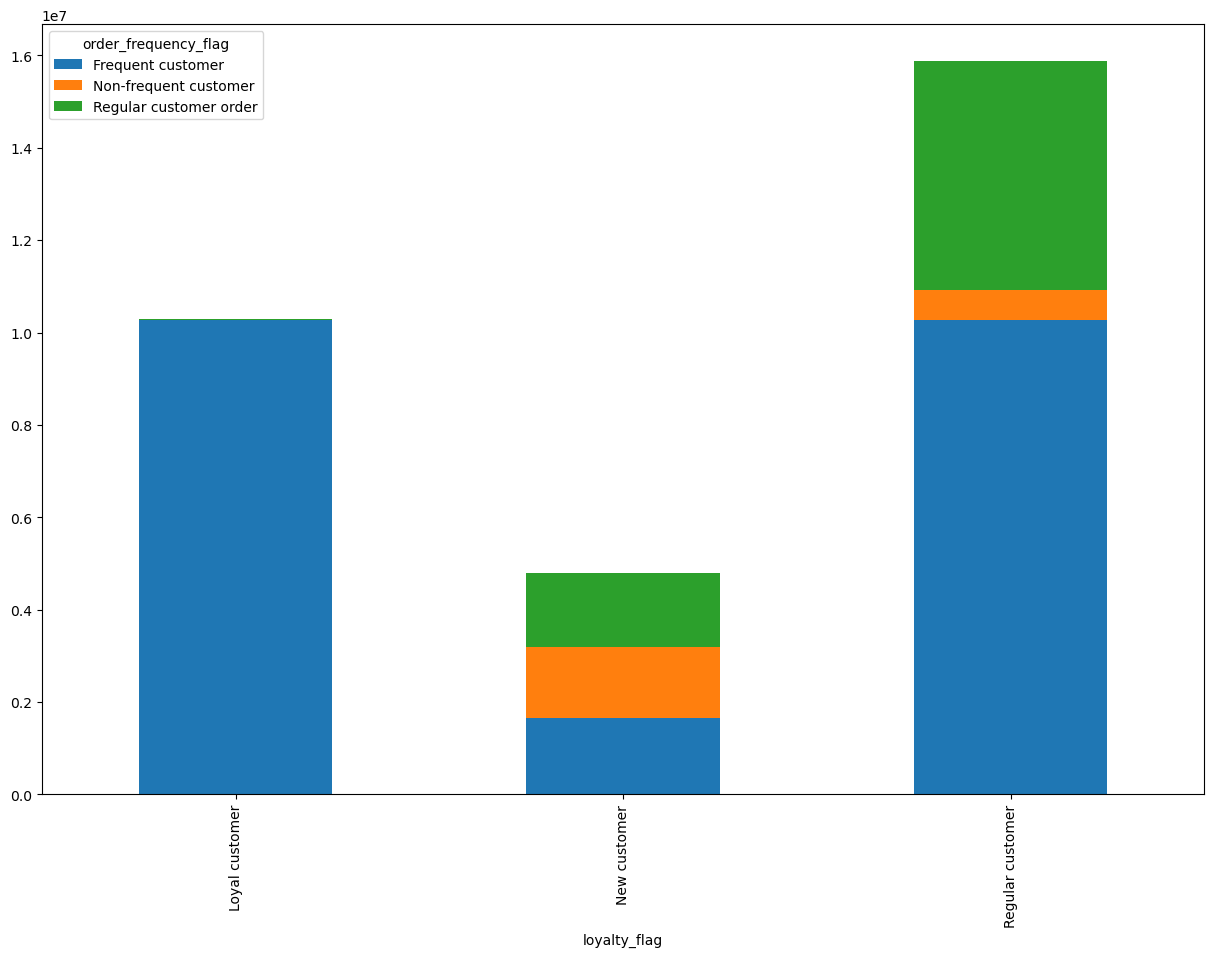

In [91]:
bar_loyalty_frequency = df_loyalty_frequency.plot.bar(stacked=True)

In [92]:
#exporting bar chart as image 
bar_loyalty_frequency.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'bar_loyalty_frequency.png'))

# Question 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [42]:
df_all_low_excluded.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'Most_orders', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'frequency_order',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       'region', 'activity', 'age_group', 'department', 'income_bracket',
       'pet_owner', 'family_shape', 'single_age', 'price_ranges'],
      dtype='object')

# Usage Frequency

In [43]:
# Checking how many orders customers make
df_all_low_excluded.groupby('order_frequency_flag').agg({'frequency_order': ['mean', 'min', 'max']})

frequency_order            
                                  mean   min   max
order_frequency_flag                              
Frequent customer             6.253892   0.0  10.0
Non-frequent customer        26.108087  20.5  30.0
Regular customer order       14.180103  10.5  20.0

In [44]:
# Checking how many orders customers make
df_all_low_excluded.groupby('family_shape').agg({'frequency_order': ['mean', 'min', 'max']})

frequency_order           
                            mean  min   max
family_shape                               
Family with Baby        8.232243  0.0  30.0
No Children             9.316159  0.0  30.0
Older Children          9.359873  0.0  30.0

In [45]:
# Checking how many orders customers make
df_all_low_excluded.groupby('income_bracket').agg({'frequency_order': ['mean', 'min', 'max']})

frequency_order           
                                 mean  min   max
income_bracket                                  
extremely high income        9.204915  0.0  30.0
extremely low income         9.619144  0.0  30.0
high income                  9.299360  0.0  30.0
low income                   9.245934  0.0  30.0
mid-range income             9.286898  0.0  30.0
very high income             9.277631  0.0  30.0

In [46]:
# Checking how many orders customers make
df_all_low_excluded.groupby('region').agg({'frequency_order': ['mean', 'min', 'max']})

frequency_order           
                      mean  min   max
region                               
Midwest           9.398922  0.0  30.0
North East        9.314293  0.0  30.0
South             9.333869  0.0  30.0
West              9.302990  0.0  30.0

In [72]:
# Checking how many orders customers make
df_all_low_excluded.groupby('pet_owner').agg({'frequency_order': ['mean', 'min', 'max']})

frequency_order           
                           mean  min   max
pet_owner                                 
not a pet owner        9.272419  0.0  30.0
pet owner              9.401826  0.0  30.0


# Prices Aggregation

In [48]:
# Checking how much customer spend
df_all_low_excluded.groupby('single_age').agg({'prices': ['mean', 'min', 'max']})

prices           
                              mean  min   max
single_age                                   
Middle Age Single         7.788602  1.0  25.0
Not Single                7.790278  1.0  25.0
Older Single              7.796821  1.0  25.0
Really Young Single       7.789148  1.0  25.0
Silent Generation Single  7.808544  1.0  25.0
Young Single              7.784862  1.0  25.0

In [49]:
# Checking how much customer spend
df_all_low_excluded.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
region                         
Midwest     7.792318  1.0  25.0
North East  7.781441  1.0  25.0
South       7.794439  1.0  25.0
West        7.790308  1.0  25.0

In [50]:
# Checking how much customer spend
df_all_low_excluded.groupby('order_frequency_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                            mean  min   max
order_frequency_flag                       
Frequent customer       7.792520  1.0  25.0
Non-frequent customer   7.770993  1.0  25.0
Regular customer order  7.790591  1.0  25.0

In [51]:
# Checking how much customer spend
df_all_low_excluded.groupby('family_shape').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
family_shape                         
Family with Baby  7.647681  1.0  15.0
No Children       7.789550  1.0  25.0
Older Children    7.792857  1.0  25.0

In [52]:
# Checking how much customer spend
df_all_low_excluded.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
age_group                             
Baby Boomer        7.797035  1.0  25.0
Gen X              7.790284  1.0  25.0
Gen Z              7.784889  1.0  25.0
Millennial         7.786186  1.0  25.0
Silent Generation  7.790535  1.0  25.0

In [73]:
# Checking how much customer spend
df_all_low_excluded.groupby('pet_owner').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
pet_owner                           
not a pet owner  7.881549  1.0  15.0
pet owner        7.701390  1.0  25.0

# Question 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [74]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['family_shape']], df_all_low_excluded['department'])

department                   alcohol  babies  bakery  beverages  breakfast  \
region     family_shape                                                      
Midwest    Family with Baby        0   71033       0          0          0   
           No Children          9531   24708   66570     149093      39293   
           Older Children      24512       0  195183     449886     116862   
North East Family with Baby        0   54687       0          0          0   
           No Children          7220   18025   50121     114465      29374   
           Older Children      17797       0  149179     348464      88530   
South      Family with Baby        0  104231       0          0          0   
           No Children         11407   35280   92995     218226      55259   
           Older Children      37406       0  278625     641193     167913   
West       Family with Baby        0   77113       0          0          0   
           No Children          8669   25315   71709     163557      42506   
           Older Children      28085       0  216446     487017     131113   

department                   bulk  canned goods  dairy eggs    deli  \
region     family_shape                                               
Midwest    Family with Baby     0             0           0       0   
           No Children       1764         58906      306945   58549   
           Older Children    6165        178553      905545  175915   
North East Family with Baby     0             0           0       0   
           No Children       1426         44269      226239   44126   
           Older Children    4173        132667      688377  134272   
South      Family with Baby     0             0           0       0   
           No Children       2818         83913      431333   85416   
           Older Children    8362        253545     1291683  248204   
West       Family with Baby     0             0           0       0   
           No Children       1992         63932      329859   65291   
           Older Children    6751        196289      997201  192061   

department                   dry goods pasta  ...  household  international  \
region     family_shape                       ...                             
Midwest    Family with Baby                0  ...          0              0   
           No Children                 48779  ...      41172          15205   
           Older Children             144684  ...     125820          45461   
North East Family with Baby                0  ...          0              0   
           No Children                 35943  ...      29857          11383   
           Older Children             107874  ...      94747          33295   
South      Family with Baby                0  ...          0              0   
           No Children                 67203  ...      56344          21116   
           Older Children             205610  ...     173717          63533   
West       Family with Baby                0  ...          0              0   
           No Children                 52371  ...      43985          16757   
           Older Children             159672  ...     134215          49241   

department                   meat seafood  missing  other  pantry  \
region     family_shape                                             
Midwest    Family with Baby             0        0      0       0   
           No Children              39551     3845   1949  104826   
           Older Children          118709    11718   6034  315508   
North East Family with Baby             0        0      0       0   
           No Children              29223     2899   1630   77793   
           Older Children           89348     8613   4638  234938   
South      Family with Baby             0        0      0       0   
           No Children              54948     5309   2958  146581   
           Older Children          169172    16478   8621  445173   
West       Family with Baby             0     

In [75]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['income_bracket']], df_all_low_excluded['department'])

department                        alcohol  babies  bakery  beverages  \
region     income_bracket                                              
Midwest    extremely high income     6133   16230   40829      87273   
           extremely low income      8026   16445   53706     153653   
           high income               4608   13021   35491      74650   
           low income                8085   27741   68520     149044   
           mid-range income          4467   15004   40066      82834   
           very high income          2724    7300   23141      51525   
North East extremely high income     5530   11392   30433      69072   
           extremely low income      5459   12811   40916     120148   
           high income               2939    8845   27019      56823   
           low income                6076   21093   54472     116593   
           mid-range income          2848   12404   29409      62361   
           very high income          2165    6167   17051      37932   
South      extremely high income     8919   21023   58225     119616   
           extremely low income     10936   23692   76411     226351   
           high income               5750   19014   46730     104821   
           low income               12679   41575  103469     221508   
           mid-range income          6552   21539   54165     120149   
           very high income          3977   12668   32620      66974   
West       extremely high income     6451   15095   44874      92278   
           extremely low income      8658   17356   59296     171405   
           high income               4578   13927   38389      81240   
           low income                8582   29990   78286     162647   
           mid-range income          5471   16038   42920      91061   
           very high income          3014   10022   24390      51943   

department                        breakfast  bulk  canned goods  dairy eggs  \
region     income_bracket                                                     
Midwest    extremely high income      23233  1053         36344      184042   
           extremely low income       38095  1952         44795      246599   
           high income                20261   924         32751      164564   
           low income                 39549  2063         64931      326710   
           mid-range income           21485  1307         36897      183773   
           very high income           13532   630         21741      106802   
North East extremely high income      16603   702         27999      136465   
           extremely low income       30167  1446         32938      188026   
           high income                14518   740         25258      123365   
           low income                 30610  1551         48337      251957   
           mid-range income           16750   745         26398      133497   
           very high income            9256   415         16006       81306   
South      extremely high income      31894  1518         51498      257278   
           extremely low income       57656  2925         64416      362204   
           high income                28431  1335         46470      224862   
           low income                 57268  3057         96038      483730   
           mid-range income           30173  1464         48639      246611   
           very high income           17750   881         30397      148331   
West       extremely high income      26249  1093         41207      202144   
           extremely low income       42766  2136         49092      276360   
           high income                21617   948         35684      175642   
           low income                 44776  2386         72952      361897   
           mid-range income           24445  1351         38514      197908   
           very high income           13766   829         22772      113109   

department                         deli  dry goods pasta  ...  household

In [76]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['pet_owner']], df_all_low_excluded['department'])

department                  alcohol  babies  bakery  beverages  breakfast  \
region     pet_owner                                                        
Midwest    not a pet owner    34043       0  261753     598979          0   
           pet owner              0   95741       0          0     156155   
North East not a pet owner    25017       0  199300     462929          0   
           pet owner              0   72712       0          0     117904   
South      not a pet owner    48813       0  371620     859419          0   
           pet owner              0  139511       0          0     223172   
West       not a pet owner    36754       0  288155     650574          0   
           pet owner              0  102428       0          0     173619   

department                   bulk  canned goods  dairy eggs    deli  \
region     pet_owner                                                  
Midwest    not a pet owner      0             0           0       0   
           pet owner         7929        237459     1212490  234464   
North East not a pet owner      0             0           0       0   
           pet owner         5599        176936      914616  178398   
South      not a pet owner      0             0           0       0   
           pet owner        11180        337458     1723016  333620   
West       not a pet owner      0             0           0       0   
           pet owner         8743        260221     1327060  257352   

department                  dry goods pasta  ...  household  international  \
region     pet_owner                         ...                             
Midwest    not a pet owner                0  ...          0          60666   
           pet owner                 193463  ...     166992              0   
North East not a pet owner                0  ...          0          44678   
           pet owner                 143817  ...     124604              0   
South      not a pet owner                0  ...          0          84649   
           pet owner                 272813  ...     230061              0   
West       not a pet owner                0  ...          0          65998   
           pet owner                 212043  ...     178200              0   

department                  meat seafood  missing  other  pantry  \
region     pet_owner                                               
Midwest    not a pet owner             0        0   7983       0   
           pet owner              158260    15563      0  420334   
North East not a pet owner             0        0   6268       0   
           pet owner              118571    11512      0  312731   
South      not a pet owner             0        0  11579       0   
           pet owner              224120    21787      0  591754   
West       not a pet owner             0        0   8581       0   
           pet owner              173830    15906      0  457886   

department                  personal care   pets  produce  snacks  
region     pet_owner                                               
Midwest    not a pet owner              0      0  2134115       0  
           pet owner               100398  21358        0  645143  
North East not a pet owner              0      0  1593004       0  
           pet owner                74765  17734        0  493154  
South      not a pet owner              0      0  3027476       0  
           pet owner               142496  29909        0  916780  
West       not a pet owner              0      0  2324678       0  
           pet owner               106647  24059        0  711329  

[8 rows x 21 columns]

In [77]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['age_group']], df_all_low_excluded['department'])

department                    alcohol  babies  bakery  beverages  breakfast  \
region     age_group                                                          
Midwest    Baby Boomer           9552   27668   76556     175564      45748   
           Gen X                 8268   24678   68707     154202      40436   
           Gen Z                 5193   11711   32051      74409      18795   
           Millennial            8160   24627   64230     148614      38840   
           Silent Generation     2870    7057   20209      46190      12336   
North East Baby Boomer           6718   21230   59882     140394      34239   
           Gen X                 6400   18982   49662     118984      29037   
           Gen Z                 3211   10231   24016      58415      15367   
           Millennial            6850   17325   49456     109912      29464   
           Silent Generation     1838    4944   16284      35224       9797   
South      Baby Boomer          14836   40844  108076     255479      64413   
           Gen X                11407   35800   92239     213948      55530   
           Gen Z                 6532   17382   48123     106976      29448   
           Millennial           12345   34820   93701     214589      56289   
           Silent Generation     3693   10665   29481      68427      17492   
West       Baby Boomer          10822   29655   83473     192327      50725   
           Gen X                10099   26404   74610     168338      46127   
           Gen Z                 4252   11910   35683      78543      21867   
           Millennial            9297   25980   71576     160067      41890   
           Silent Generation     2284    8479   22813      51299      13010   

department                    bulk  canned goods  dairy eggs   deli  \
region     age_group                                                  
Midwest    Baby Boomer        2544         68838      350309  68649   
           Gen X              1901         61794      314885  59810   
           Gen Z               911         30327      149323  28860   
           Millennial         1966         58475      303977  59212   
           Silent Generation   607         18025       93996  17933   
North East Baby Boomer        1544         52385      272049  53273   
           Gen X              1404         44539      229530  44676   
           Gen Z               803         21334      113408  22300   
           Millennial         1393         44234      226367  43398   
           Silent Generation   455         14444       73262  14751   
South      Baby Boomer        3111         97683      502657  97765   
           Gen X              2847         83395      424745  81612   
           Gen Z              1562         43141      222472  43333   
           Millennial         2760         86247      439741  84724   
           Silent Generation   900         26992      133401  26186   
West       Baby Boomer        2547         77351      393978  76255   
           Gen X              2262         65993      336852  66409   
           Gen Z              1030         31510      162290  30062   
           Millennial         2229         65431      331372  64478   
           Silent Generation   675         19936      102568  20148   

department                    dry goods pasta  ...  household  international  \
region     age_group                           ...                             
Midwest    Baby Boomer                  56722  ...      48492          17404   
           Gen X                        50390  ...      43095          15551   
           Gen Z                        24870  ...      21793           7962   
           Millennial                   46491  ...      40703          15127   
           Silent Generation            14990  ...      12909           4622   
North East Baby Boomer                  43008  ...      37476          13030   
           Gen X                        35867  ...      30

In [78]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['loyalty_flag']], df_all_low_excluded['department'])

department                   alcohol  babies  bakery  beverages  breakfast  \
region     loyalty_flag                                                      
Midwest    Loyal customer       9176   38508   86553     193574      50368   
           New customer         6582   11121   40708      93916      25521   
           Regular customer    18285   46112  134492     311489      80266   
North East Loyal customer       6560   29603   69178     158410      40083   
           New customer         5287    7875   30032      70068      18543   
           Regular customer    13170   35234  100090     234451      59278   
South      Loyal customer      13264   57863  124727     283753      72625   
           New customer         9655   16203   57054     131484      34573   
           Regular customer    25894   65445  189839     444182     115974   
West       Loyal customer       9723   41134   99415     219280      58501   
           New customer         7105   11509   44310     101181      27542   
           Regular customer    19926   49785  144430     330113      87576   

department                   bulk  canned goods  dairy eggs    deli  \
region     loyalty_flag                                               
Midwest    Loyal customer    3346         67198      420968   75751   
           New customer      1010         42789      178080   37187   
           Regular customer  3573        127472      613442  121526   
North East Loyal customer    2248         52528      330508   57758   
           New customer       705         31328      130240   27918   
           Regular customer  2646         93080      453868   92722   
South      Loyal customer    4371         98527      606209  106305   
           New customer      1391         59596      248116   52729   
           Regular customer  5418        179335      868691  174586   
West       Loyal customer    3869         76341      473022   84232   
           New customer      1043         46483      193620   40501   
           Regular customer  3831        137397      660418  132619   

department                   dry goods pasta  ...  household  international  \
region     loyalty_flag                       ...                             
Midwest    Loyal customer              56472  ...      46073          17753   
           New customer                34390  ...      30551          10622   
           Regular customer           102601  ...      90368          32291   
North East Loyal customer              42431  ...      36358          14018   
           New customer                25167  ...      22275           7503   
           Regular customer            76219  ...      65971          23157   
South      Loyal customer              79662  ...      64062          25779   
           New customer                47535  ...      42722          14512   
           Regular customer           145616  ...     123277          44358   
West       Loyal customer              64015  ...      50380          20844   
           New customer                37744  ...      32569          11204   
           Regular customer           110284  ...      95251          33950   

department                   meat seafood  missing  other  pantry  \
region     loyalty_flag                                             
Midwest    Loyal customer           46766     4278   2500  130924   
           New customer             27046     3004   1369   71384   
           Regular customer         84448     8281   4114  218026   
North East Loyal customer           35962     3426   2003  100459   
           New customer             19529     2141   1112   51943   
           Regular customer         63080     5945   3153  160329   
South      Loyal customer           66526     6004   3674  184072   
           New customer             37201     4374   1913   99922   
           Regular customer        120393    11409   5992  307760   
West       Loyal customer           53226     

In [79]:
pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['loyalty_flag']], df_all_low_excluded['spending_flag'])

spending_flag                High spender  Low spender
region     loyalty_flag                               
Midwest    Loyal customer           52096      2321678
           New customer             21764      1114997
           Regular customer         74818      3676160
North East Loyal customer           35960      1805825
           New customer             13572       828584
           Regular customer         53588      2727156
South      Loyal customer           72017      3333827
           New customer             26279      1567385
           Regular customer        101043      5210588
West       Loyal customer           56527      2606163
           New customer             22396      1208718
           Regular customer         73365      3960058

# Question 9

Produce suitable charts to illustrate your results and export them in your project folder.

In [138]:
hig_low_mid_spender = pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['loyalty_flag']], df_all_low_excluded['price_ranges'])

Text(0.5, 1.0, 'Spending Power')

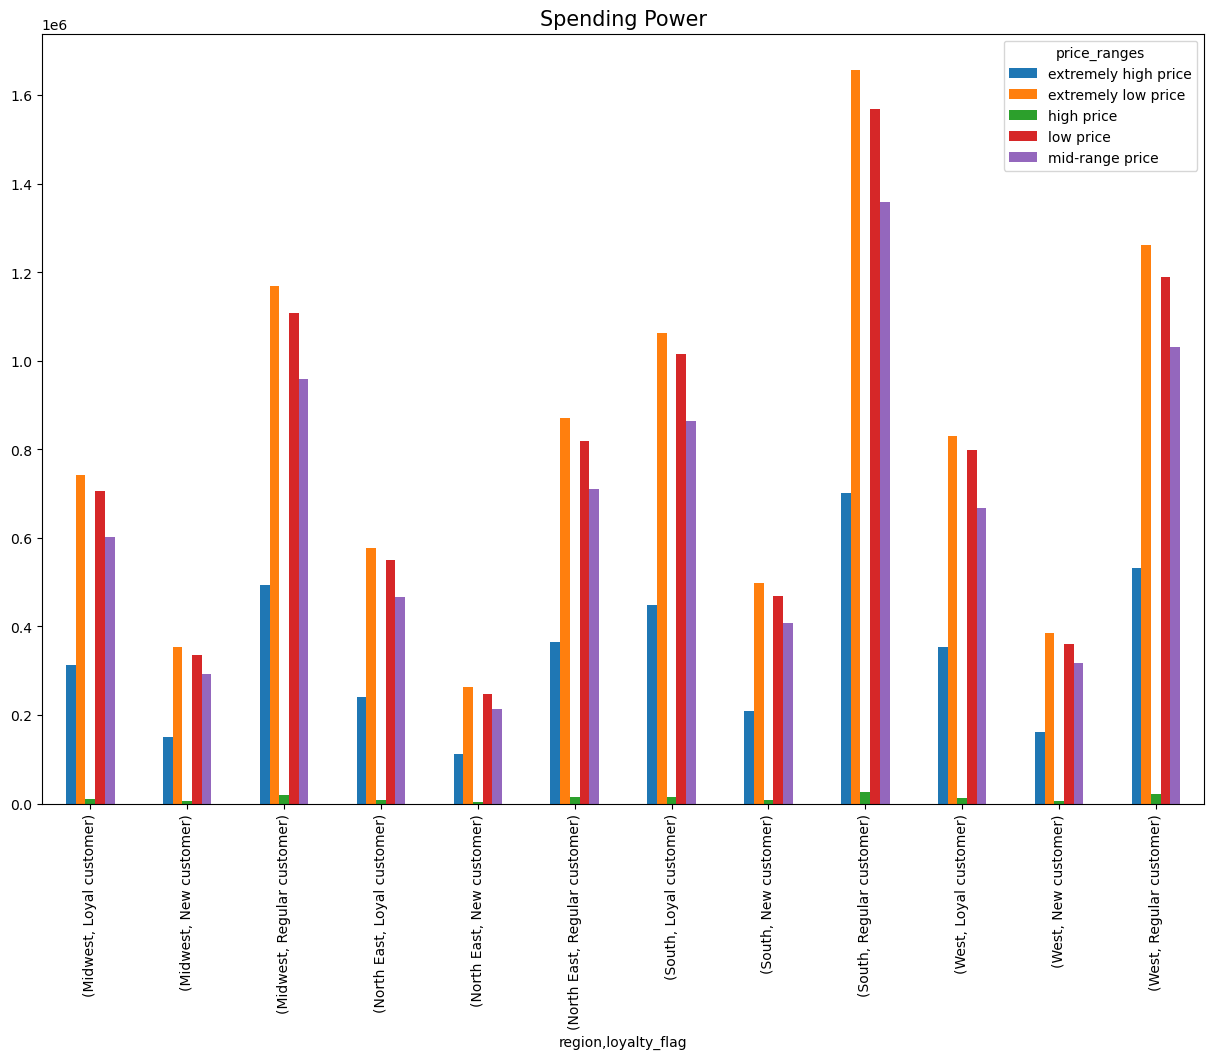

In [139]:
barhig_low_mid_spender = hig_low_mid_spender.plot.bar(stacked=False)
plt.title('Spending Power',fontsize=15)

In [140]:
#exporting bar chart as image 
barhig_low_mid_spender.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'barhig_low_mid_spender.png'))

In [110]:
familyshapespend = pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['family_shape']], df_all_low_excluded['department'])

Text(0.5, 1.0, 'Orders by Family Shape')

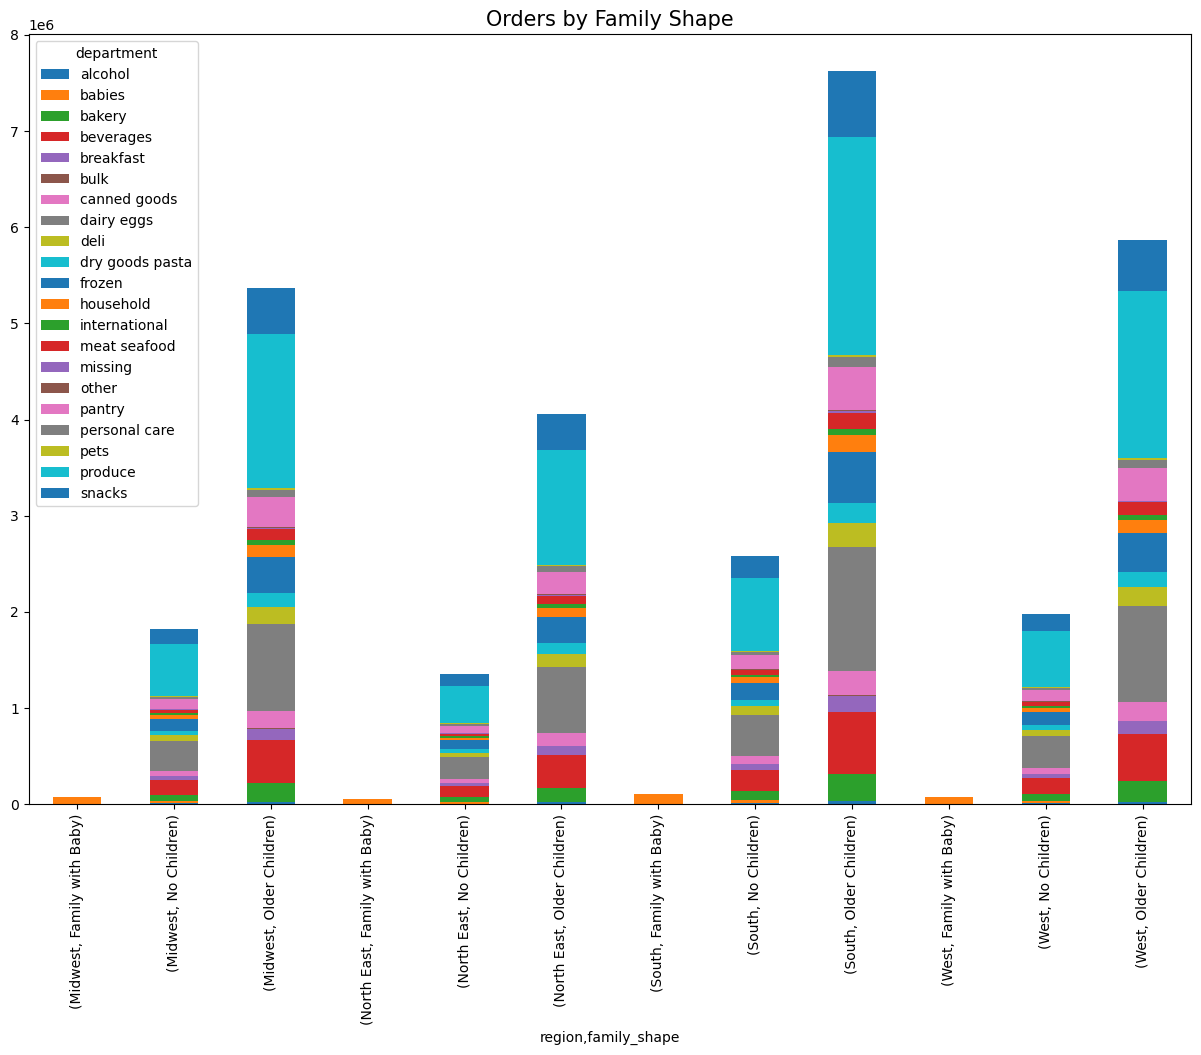

In [111]:
familyshapespend = familyshapespend.plot.bar(stacked=True)
plt.title('Orders by Family Shape',fontsize=15)

In [112]:
#exporting bar chart as image 
familyshapespend.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'familyshapespend.png'))

In [113]:
ageshapespend = pd.crosstab([df_all_low_excluded['region'], df_all_low_excluded['age_group']], df_all_low_excluded['department'])

Text(0.5, 1.0, 'Purchases by Age Group and Region')

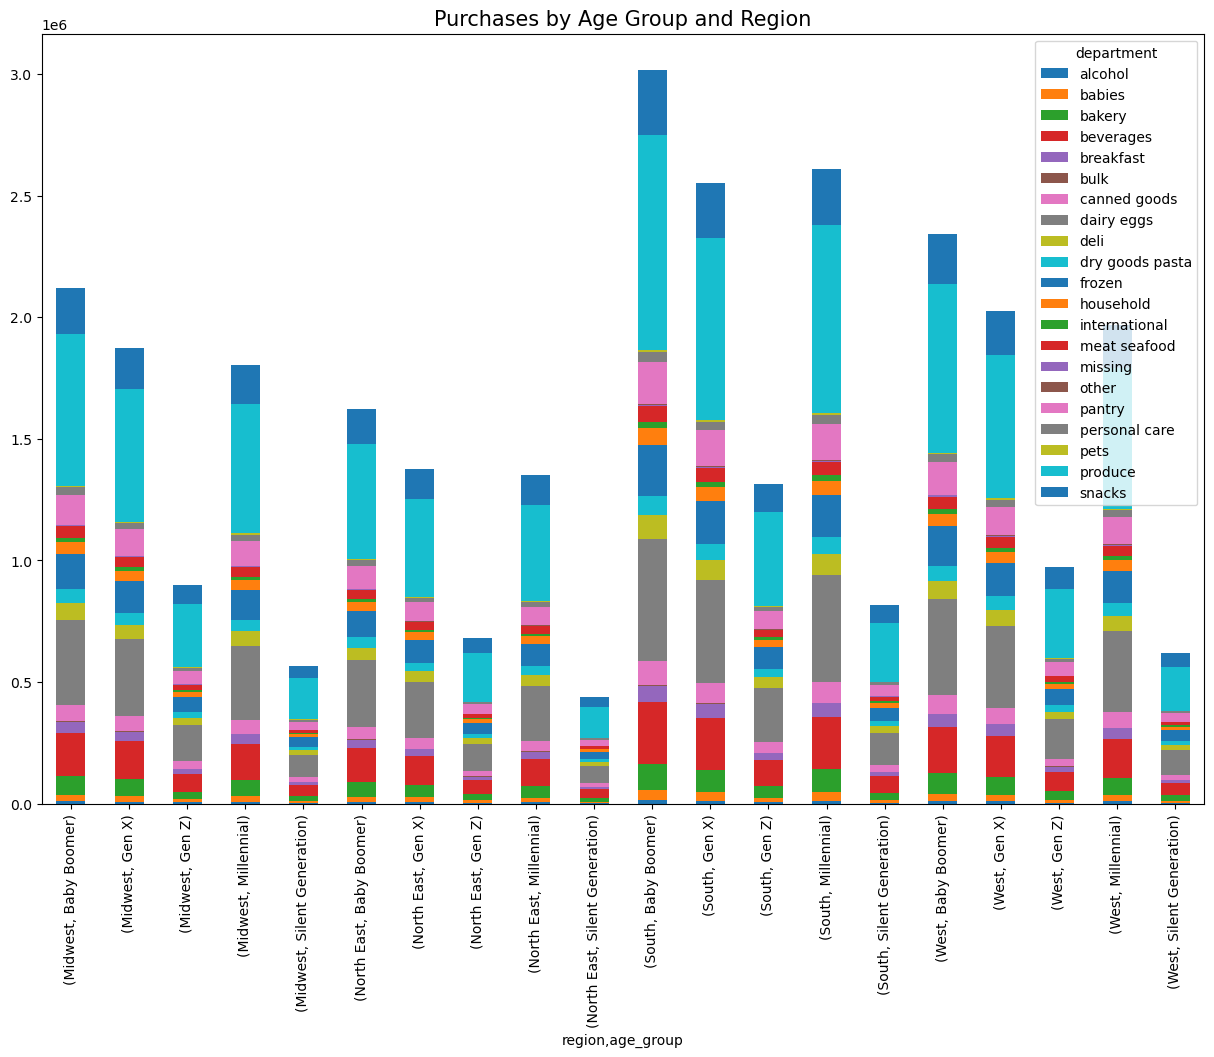

In [114]:
ageshapespend = ageshapespend.plot.bar(stacked=True)
plt.title('Purchases by Age Group and Region',fontsize=15)

In [115]:
#exporting bar chart as image 
ageshapespend.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'ageshapespend.png'))

In [116]:
ageshapespend2 = pd.crosstab([df_all_low_excluded['family_shape'], df_all_low_excluded['age_group']], df_all_low_excluded['price_ranges'])

Text(0.5, 1.0, 'Spend by Family Shape and Age')

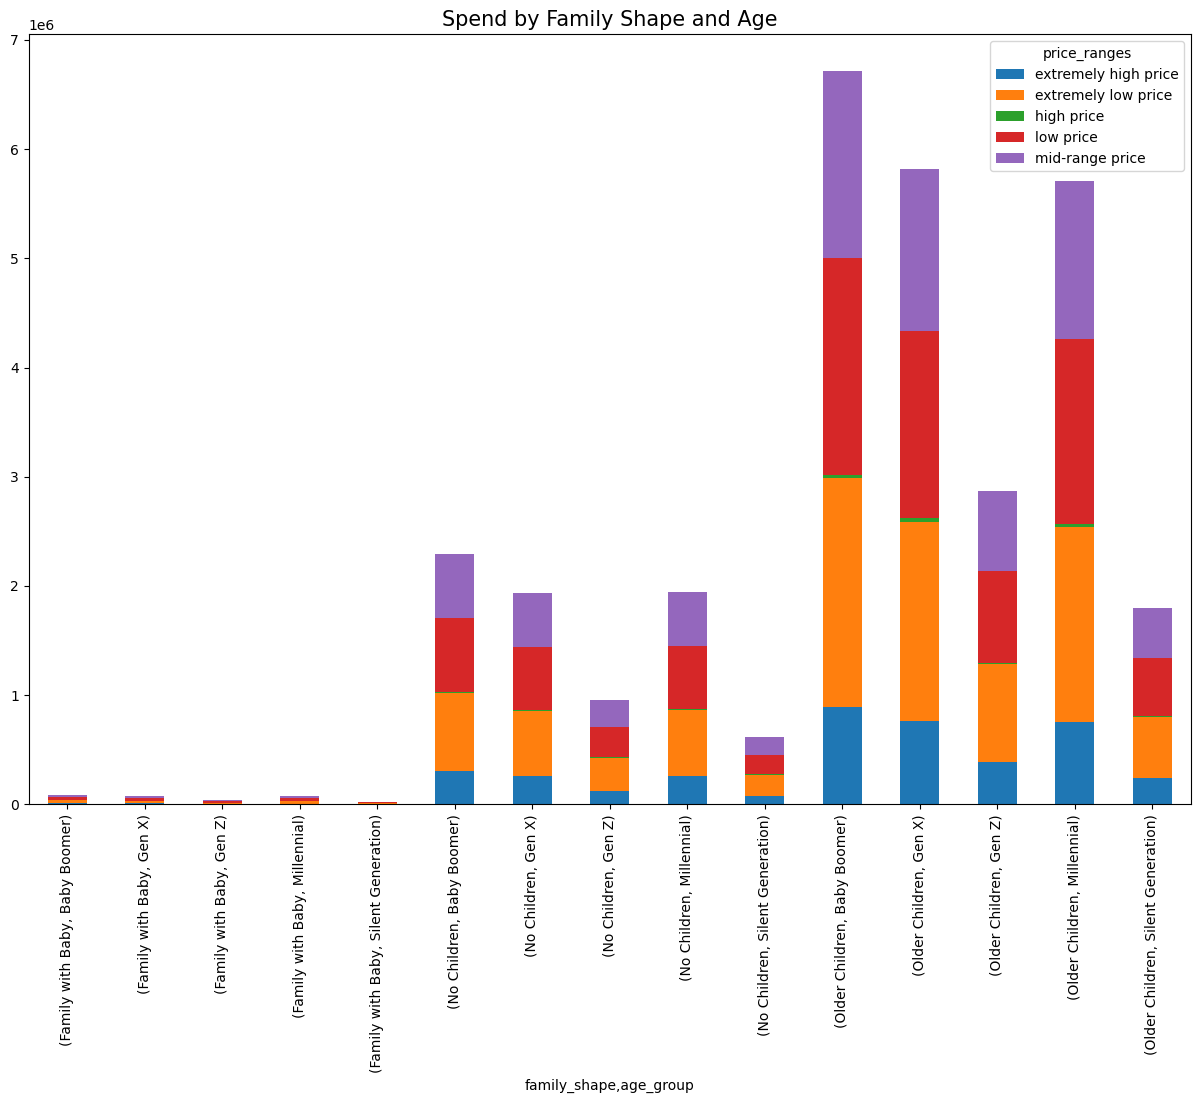

In [117]:
ageshapespend2 = ageshapespend2.plot.bar(stacked=True)
plt.title('Spend by Family Shape and Age',fontsize=15)

In [118]:
#exporting bar chart as image 
ageshapespend2.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'ageshapespend2.png'))

In [128]:
returnorders = pd.crosstab([df_all_low_excluded['loyalty_flag'], df_all_low_excluded['order_frequency_flag']], df_all_low_excluded['Most_orders'])

Text(0.5, 1.0, 'Frequency of Orders')

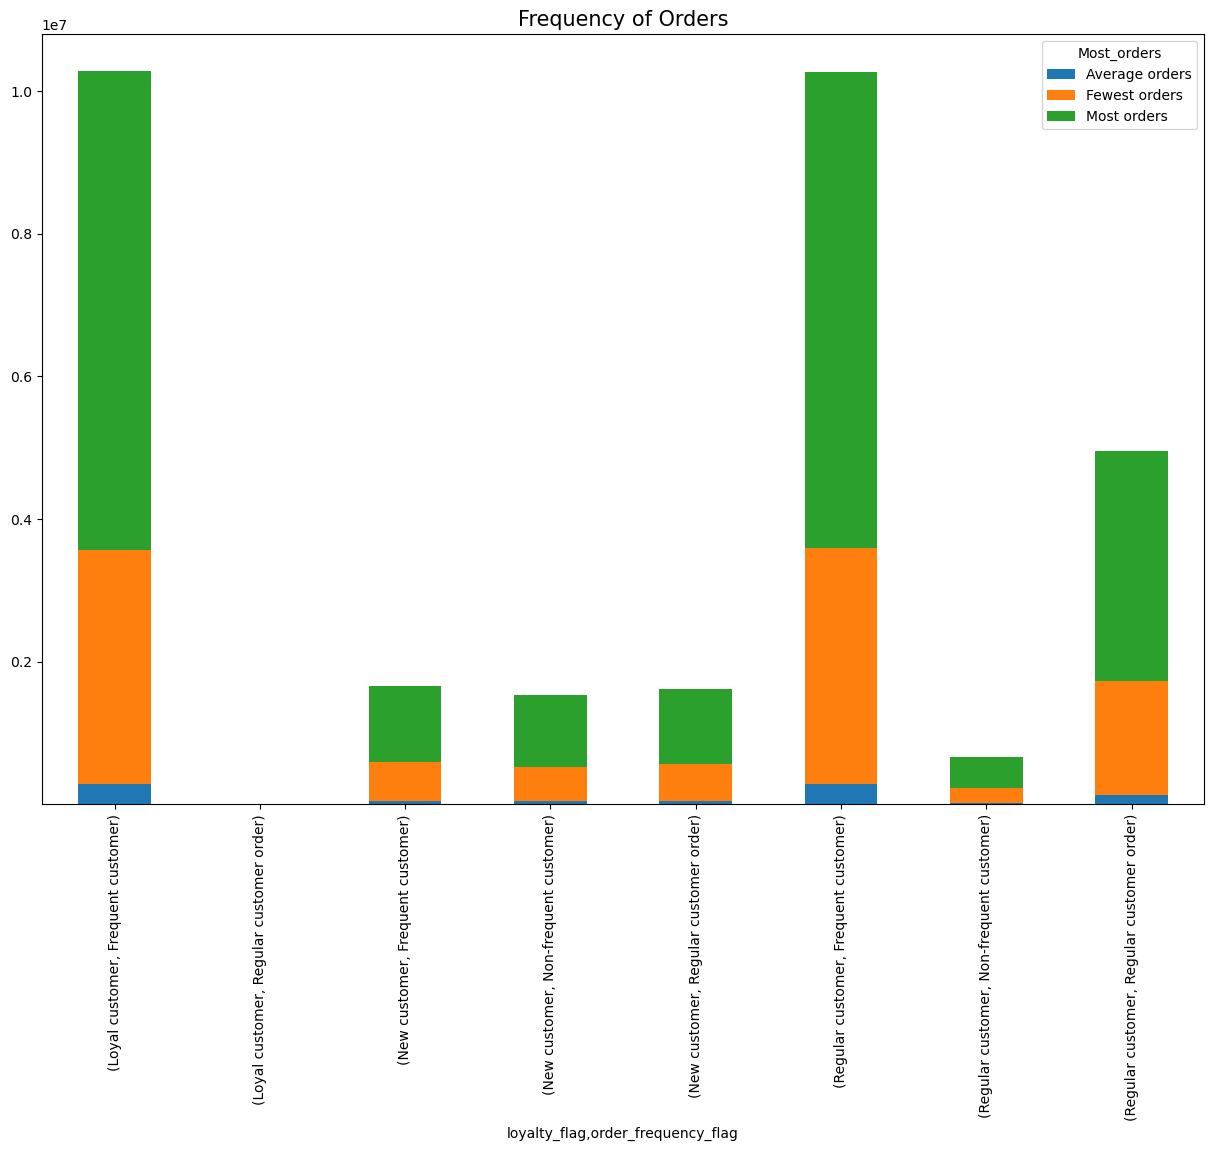

In [129]:
returnorders = returnorders.plot.bar(stacked=True)
plt.title('Frequency of Orders',fontsize=15)

In [125]:
#exporting bar chart as image 
returnorders.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'returnorders.png'))

In [132]:
mostorders = pd.crosstab(df_all_low_excluded['department'], df_all_low_excluded['Most_orders'])

Text(0.5, 1.0, 'Most Orders by Department')

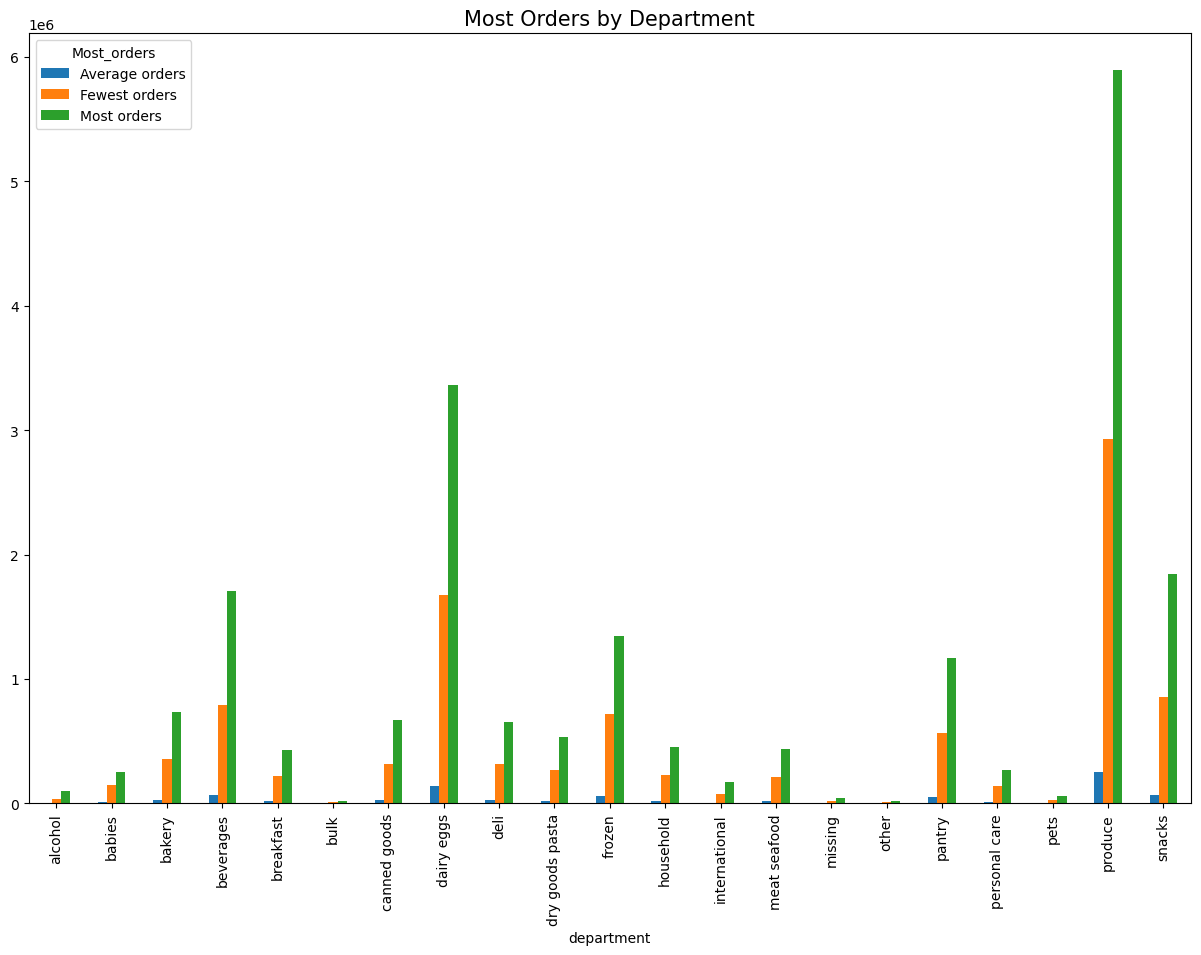

In [133]:
mostorders = mostorders.plot.bar(stacked=False)
plt.title('Most Orders by Department',fontsize=15)

In [134]:
#exporting bar chart as image 
mostorders.figure.savefig(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\04 Analysis\Visualizations\'mostorders.png'))

In [ ]:
# Export data df_all_low_excluded to pkl - I can't actually export this as it breaks
df_all_low_excluded.to_pickle(os.path.join(r'C:\Users\Sarah\Desktop\Data Course\08-12-2022 Instacart Basket Analysis\02 Data\Prepared Data\all_low_excludedNEW.pkl'))